### Code for all tables and figures of GWAS analysis

In [7]:

os.chdir("E:\\GWAS\\plink_win64_20231211 - Copy") ## set directory where required files are saved
matresult = [];
alpha = 0.05
zall = [];
lcfdrscall = [];
lcfdr0all = [];
lcfdr1all = [];
lcfdr2all = [];
lcfdr3all = [];
for chno in np.arange(1,23):
    Z = np.array(pd.read_csv(f'zlcfdrsp_chr{chno}.csv',header=None));
    result = np.array([np.size(np.where(statsmodels.stats.multitest.multipletests(2*(1-norm.cdf(abs(Z[:,0]))), 
                                                   alpha=(alpha/(1-0.)), method='fdr_bh', 
                                                         is_sorted=False, returnsorted=False)[0]==True)[0]),np.size(np.where(statsmodels.stats.multitest.multipletests(2*(1-norm.cdf(abs(Z[:,0]))), 
                                                   alpha=(alpha/(1-max(est_sun_cai_r(FloatVector(Z[:,0]),0.,1.)+0.))), method='fdr_bh', 
                                                         is_sorted=False, returnsorted=False)[0]==True)[0]),np.size(rejected(Z[:,1],alpha))
                      ,np.size(rejected(Z[:,2],alpha)),np.size(rejected(Z[:,3],alpha)),np.size(rejected(Z[:,4],alpha)),np.size(rejected(Z[:,5],alpha))]);
    matresult.append(result);
    zall = np.append(zall,Z[:,0])
    lcfdrscall = np.append(lcfdrscall,Z[:,1])
    lcfdr0all = np.append(lcfdr0all,Z[:,2])
    lcfdr1all = np.append(lcfdr1all,Z[:,3])
    lcfdr2all = np.append(lcfdr2all,Z[:,4])
    lcfdr3all = np.append(lcfdr3all,Z[:,5])

In [9]:
np.size(zall)

486573

### Chromose Wise Analysis Results

In [11]:
matresult

[array([32, 32, 34, 49, 54, 65, 71]),
 array([24, 29, 28, 40, 43, 48, 56]),
 array([18, 23, 21, 35, 37, 43, 52]),
 array([24, 25, 29, 38, 45, 44, 42]),
 array([33, 36, 35, 50, 54, 58, 60]),
 array([21, 23, 27, 38, 47, 52, 52]),
 array([19, 22, 23, 30, 33, 38, 38]),
 array([12, 13, 16, 22, 28, 27, 32]),
 array([25, 27, 31, 37, 35, 38, 42]),
 array([ 6,  6,  7, 17, 22, 26, 31]),
 array([15, 17, 18, 28, 32, 33, 34]),
 array([23, 27, 27, 37, 42, 48, 56]),
 array([ 8, 14, 14, 14, 15, 16, 18]),
 array([ 3,  3,  5,  9, 12, 19, 21]),
 array([21, 21, 26, 36, 42, 47, 51]),
 array([ 3,  5,  8, 13, 13, 15, 14]),
 array([12, 15, 17, 25, 28, 34, 36]),
 array([16, 17, 21, 27, 26, 26, 26]),
 array([34, 35, 33, 42, 47, 50, 52]),
 array([11, 15, 15, 23, 28, 32, 31]),
 array([ 2,  2,  8,  6, 10, 11, 12]),
 array([0, 0, 0, 0, 0, 0, 0])]

In [13]:
# row_names = ['Row1', 'Row2', 'Row3']
# column_names = ["BH", "ABH", "Sun&Cai","$\hat{T}_0$","$\hat{T}_1$","$\hat{T}_2$","$\hat{T}_3$"]
row_names = [];
for chn in np.arange(1,23):
    row_names.append(f'chr{chn}')

# Create the DataFrame (matrix)
matrix = pd.DataFrame(matresult, index=row_names)

In [15]:
matrix

,0,1,2,3,4,5,6
chr1,32,32,34,49,54,65,71
chr2,24,29,28,40,43,48,56
chr3,18,23,21,35,37,43,52
chr4,24,25,29,38,45,44,42
chr5,33,36,35,50,54,58,60
chr6,21,23,27,38,47,52,52
chr7,19,22,23,30,33,38,38
chr8,12,13,16,22,28,27,32
chr9,25,27,31,37,35,38,42
chr10,6,6,7,17,22,26,31


In [17]:
matrix.to_csv('chromosewise_rejectionsp.csv')

### Upset Plot of rejections combinied all chromosomes

In [21]:
def rejected(p_val,level):
    oo = np.argsort(p_val);
    ss = np.sort(p_val);
    stat = np.divide(np.cumsum(ss),np.arange(1,np.size(ss)+1,1));
    collection = np.where(stat <= level);
    return(ss[collection]);

In [23]:
pi_est = max(est_sun_cai_r(FloatVector(zall),0.,1.)+0.);

In [25]:
rejT0 = np.where(lcfdr0all<=rejected(lcfdr0all,alpha)[-1])[0]
rejT1 = np.where(lcfdr1all<=rejected(lcfdr1all,alpha)[-1])[0]
rejT2 = np.where(lcfdr2all<=rejected(lcfdr2all,alpha)[-1])[0]
rejT3 = np.where(lcfdr3all<=rejected(lcfdr3all,alpha)[-1])[0]
rejsc = np.where(lcfdrscall<=rejected(lcfdrscall,alpha)[-1])[0]
rejbh = np.where(statsmodels.stats.multitest.multipletests(2*(1-norm.cdf(abs(zall))), 
                                                   alpha=(alpha/(1-0.)), method='fdr_bh', 
                                                         is_sorted=False, returnsorted=False)[0]==True)[0]
rejabh = np.where(statsmodels.stats.multitest.multipletests(2*(1-norm.cdf(abs(zall))), 
                                                   alpha=(alpha/(1-pi_est)), method='fdr_bh', 
                                                         is_sorted=False, returnsorted=False)[0]==True)[0]

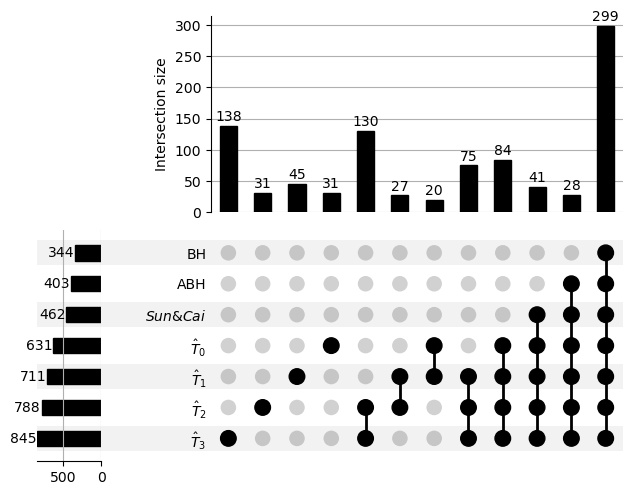

In [33]:
import upsetplot
import matplotlib.pyplot as plt
from upsetplot import from_contents
import warnings

warnings.filterwarnings("ignore")

animals = from_contents(
    {"$\hat{T}_0$": rejT0, "$\hat{T}_1$": rejT1, "$\hat{T}_2$": rejT2, "$\hat{T}_3$": rejT3, "$Sun&Cai$": rejsc, "ABH": rejabh, "BH":rejbh}
)
from upsetplot import UpSet

ax_dict = UpSet(animals, subset_size="count",min_subset_size=15,show_counts=True).plot()
plt.savefig('upsetplot_rejectionsp.png', dpi=300)

In [ ]:
pyplot.savefig("/path/to/myplot.png")

### Finding those 138 independently associated SNPs

In [77]:
ChWiseRej = np.array([]);
for chno in np.arange(1,23):
    Z = np.array(pd.read_csv(f'zlcfdrsp_chr{chno}.csv',header=None));
    ChWiseRej = np.append(ChWiseRej,np.repeat(chno,Z.shape[0]));

In [81]:
# np.size(np.where(ChWiseRej==22))
ChWiseRej

array([ 1.,  1.,  1., ..., 22., 22., 22.])

In [112]:
# Union of all sets
all_elements = set(rejbh) | set(rejabh) | set(rejsc) | set(rejT0) | set(rejT1) | set(rejT2) | set(rejT3) 

# Intersection of A with the complements of the other sets
onlyT3 = all_elements - set(rejbh) & all_elements - set(rejabh) & all_elements - set(rejsc) & all_elements - set(rejT0) & all_elements - set(rejT1) & all_elements - set(rejT2) & set(rejT3)
onlyT3 = np.array(list(onlyT3))
ChWiseRej[onlyT3]

array([ 2.,  8., 19.,  6.,  2., 12.,  6.,  2., 15.,  1., 19., 10., 17.,
       10., 11.,  2., 10., 11., 20.,  8., 17., 14., 12.,  8., 22., 12.,
       12., 17.,  5.,  3.,  6., 18., 11., 11., 11., 12.,  1., 15., 14.,
        1., 13., 15., 21.,  5., 10., 19.,  9., 15.,  3.,  9., 13., 10.,
        6.,  9.,  3.,  3., 12.,  9.,  8.,  6.,  5.,  7., 15.,  2., 12.,
        5.,  7., 10.,  2.,  3., 18.,  2., 20., 15., 13., 16., 10.,  4.,
        9.,  1.,  3.,  3.,  2.,  7., 20.,  2.,  3., 10., 21., 20., 17.,
        1., 17.,  5.,  9.,  3.,  4.,  7.,  9., 21.,  6., 20.,  6.,  1.,
       19.,  6., 17.,  8., 22.,  4.,  3., 22.,  1.,  1., 20., 12., 17.,
       12.,  8.,  5.,  6., 22., 12.,  7.,  8.,  1.,  7., 19.,  2.,  2.,
       18.,  2., 17.,  9.,  1., 16., 10., 13.])

In [114]:
Chridrej = ChWiseRej[rejT3]
Chridrejno = np.array([]);
for chno in range(1,23):
    Chridrejno = np.append(Chridrejno,np.size(np.where(Chridrej == chno)));

In [116]:
Chridrejno

array([76., 54., 51., 39., 57., 59., 41., 37., 45., 32., 34., 56., 22.,
       21., 45., 15., 37., 28., 45., 33., 12.,  6.])

In [118]:
Chridreju = ChWiseRej[onlyT3]
Chridrejuno = np.array([]);
for chno in range(1,23):
    Chridrejuno = np.append(Chridrejuno,np.size(np.where(Chridreju == chno)));

In [120]:
Chridrejuno

array([10., 12., 10.,  3.,  6.,  9.,  6.,  7.,  8.,  9.,  5., 10.,  4.,
        2.,  6.,  2.,  8.,  3.,  5.,  6.,  3.,  4.])

In [122]:
from scipy.io import savemat, loadmat

In [136]:
rsidsall = np.array([]);
for  chno in range(1,23):
    loaded = np.load(f'rsidlistp_chr{chno}.npz')
    Rsid = [loaded[f'arr_{i}'] for i in range(len(loaded.files))]  
    for rsid in Rsid:
        rsidsall = np.append(rsidsall,rsid);

In [150]:
onlyT3rsid = rsidsall[onlyT3];

In [152]:
np.save('onlyT3rsid.npy', onlyT3rsid)

In [154]:
load = np.load('onlyT3rsid.npy')

In [156]:
load ### 138 independently associated SNPs by T3 statistics

array(['rs13030608', 'rs3802266', 'rs1799817', 'rs55903909', 'rs6714546',
       'rs57038108', 'rs220003', 'rs62188361', 'rs1126823', 'rs12073069',
       'rs17254556', 'rs1171619', 'rs28760438', 'rs12569940',
       'rs180906734', 'rs75145077', 'rs7094463', 'rs12793619',
       'rs8123195', 'rs10101716', 'rs1431318', 'rs10139660', 'rs35277588',
       'rs10095184', 'rs11705239', 'rs12314162', 'rs12426238',
       'rs11654879', 'rs75073573', 'rs12494525', 'rs761390', 'rs7232395',
       'rs35903991', 'rs74050111', 'rs79155300', 'rs7978874',
       'rs11548323', 'rs72766300', 'rs17765575', 'rs12739678',
       'rs2209871', 'rs7170035', 'rs372563', 'rs76832821', 'rs4751022',
       'rs72999181', 'rs12684650', 'rs17117784', 'rs6792408',
       'rs16936469', 'rs9545018', 'rs3802569', 'rs610913', 'rs1858838',
       'rs7652177', 'rs9857967', 'rs12424086', 'rs966097', 'rs1427254',
       'rs11970772', 'rs16821', 'rs10225292', 'rs1841573', 'rs4666974',
       'rs55747855', 'rs1368380', 'rs646